In [1]:
import pandas as pd

In [2]:
ds = pd.read_csv('model2_Dataa.csv')

In [3]:
y=ds['Diet']

In [4]:
y_cat = pd.get_dummies(y)

In [5]:
X =ds[ ['age', 'Diabeties', 'BP',
       'Prefer Dairy Products', 'Prefer Food Type'] ]

In [6]:
db = X['Diabeties']

In [7]:
db = pd.get_dummies(db , drop_first=True)

In [8]:
bp = X['BP']

In [9]:
bp= pd.get_dummies(bp , drop_first=True)

In [10]:
fd = X['Prefer Food Type']

In [11]:
fd  = pd.get_dummies(fd, drop_first=True)

In [12]:
br = X['Prefer Dairy Products']

In [13]:
br = pd.get_dummies(br , drop_first=True)

In [14]:
brr=br

In [15]:
brr

,Sometimes,Yes
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
209,0,0
210,0,0
211,0,0
212,0,0


In [16]:
brr=pd.get_dummies(br , drop_first=True)

In [17]:
brr1=brr['Yes']

In [18]:
brr1=pd.get_dummies(brr1, drop_first=True)

In [19]:
brr1

,1
0,1
1,0
2,1
3,1
4,1
...,...
209,0
210,0
211,0
212,0


In [20]:
brr

,Sometimes,Yes
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
209,0,0
210,0,0
211,0,0
212,0,0


In [21]:
age = ds['age']

In [22]:
final_dataset = pd.concat( [ age,db,bp,fd,brr1], axis=1)

In [23]:
X=final_dataset

In [24]:
X[0:115]

,age,Yes,Yes,Veg,1
0,22,1,0,0,1
1,42,1,0,1,0
2,50,0,0,1,1
3,30,0,0,0,1
4,34,0,0,1,1
...,...,...,...,...,...
110,22,0,1,0,0
111,55,0,1,0,0
112,30,0,1,1,0
113,42,0,1,0,0


In [25]:
y_cat

,1,2,3
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
209,0,0,1
210,0,0,1
211,0,0,1
212,0,0,1


In [26]:
from keras.models import Sequential


In [27]:
model = Sequential()

In [28]:
from keras.layers import Dense

In [29]:
model.add(
Dense(units=10,
      activation='relu',
      input_shape=(5,),
      kernel_initializer='he_normal',
      bias_initializer='he_normal'
))

In [30]:
model.add(Dense(units=20,
               activation='relu',
               kernel_initializer='he_normal',
      bias_initializer='he_normal'))

In [31]:
model.add(Dense(units=20,
               activation='relu',
               kernel_initializer='he_normal',
      bias_initializer='he_normal'))

In [32]:
model.add(Dense(units=3,
                activation='softmax'))

In [33]:
model.compile(optimizer='adam', 
            loss='categorical_crossentropy',
             metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 63        
Total params: 763
Trainable params: 763
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(X,y_cat,epochs=120)

Epoch 1/120
7/7 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 2/120
7/7 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 3/120
7/7 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 4/120
7/7 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 5/120
7/7 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 6/120
7/7 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 7/120
7/7 [==============================] - 0s 6ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 8/120
7/7 [==============================] - 0s 5ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 9/120
7/7 [==============================] - 0s 9ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 10/120
7/7 [==============================] - 0s 4ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 11/120
7/7 [===========

In [57]:
p=model.predict([[43,0,0,1,0]])    #3

In [58]:
p

array([[1.2935071e-17, 1.2278365e-03, 9.9877208e-01]], dtype=float32)

In [59]:
p=model.predict([[42,1,0,1,0]])       #2

In [60]:
p

array([[1.1168631e-03, 9.9867851e-01, 2.0461672e-04]], dtype=float32)

In [61]:
p=model.predict([[22,1,0,0,0]])  #1

In [62]:
p

array([[9.9844152e-01, 1.5584574e-03, 6.2204096e-11]], dtype=float32)

In [63]:
p=model.predict([[42,0,1,1,0]]) #1

In [64]:
p

array([[9.9970299e-01, 2.9691233e-04, 1.1889865e-07]], dtype=float32)

In [65]:
p=model.predict([[57,0,0,1,0]]) #3

In [66]:
p

array([[2.9236252e-17, 4.5226966e-03, 9.9547738e-01]], dtype=float32)

In [48]:
p=model.predict([[57,0,0,0,0]])  #2

In [49]:
p

array([[7.8908517e-05, 9.7617233e-01, 2.3748772e-02]], dtype=float32)

In [50]:
p=model.predict([[37,0,0,1,0]])   #3

In [51]:
p

array([[6.7323032e-09, 1.8207084e-02, 9.8179287e-01]], dtype=float32)

In [67]:
model.save('100%.h5')

In [125]:
p=model.predict([[22,1,0,0,1]])  #1

In [126]:
p

array([[9.8810965e-01, 1.1888158e-02, 2.1933752e-06]], dtype=float32)

In [105]:
p=model.predict([[42,1,0,1,0]]) #2

In [106]:
p

array([[0.03282675, 0.9638059 , 0.00336731]], dtype=float32)

In [107]:
p=model.predict([[43,0,0,1,0]]) #3

In [108]:
p

array([[0.00614573, 0.01348631, 0.980368  ]], dtype=float32)

In [109]:
p=model.predict([[53,0,0,1,0]]) #3

In [110]:
p

array([[0.00960227, 0.01630968, 0.9740881 ]], dtype=float32)

In [112]:
p=model.predict([[34,0,0,1,1]]) #2

In [113]:
p

array([[7.512555e-05, 9.914910e-01, 8.433839e-03]], dtype=float32)

In [114]:
import math

In [115]:
max(4,5,6)

6

In [117]:
max(7.512555e-05, 9.914910e-01, 8.433839e-03)

0.991491

In [157]:
p=model.predict([[22,0,1,0,0]]) #1

In [158]:
p

array([[9.9785429e-01, 1.6171178e-08, 2.1457330e-03]], dtype=float32)

In [165]:
p=model.predict([[30,0,1,1,0]]) #1

In [166]:
p

array([[9.9943656e-01, 7.6183521e-12, 5.6338578e-04]], dtype=float32)

In [39]:
import seaborn as sns;

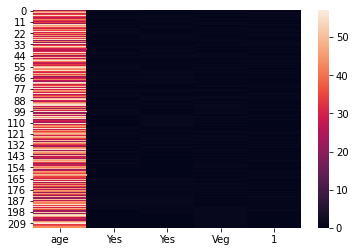

In [112]:
a=sns.heatmap(X)
f=a.get_figure()
f.savefig('X.png')

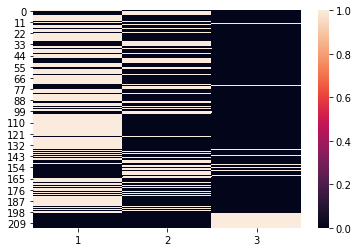

In [113]:
a=sns.heatmap(y_cat)
f=a.get_figure()
f.savefig('y_cat.png')

In [47]:
import matplotlib.pyplot as plt

In [102]:
l=model.history.history['loss']

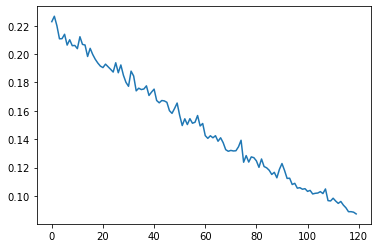

In [108]:
plt.plot(l)
plt.savefig('LOSS.PNG')

In [105]:
acc=model.history.history['accuracy']

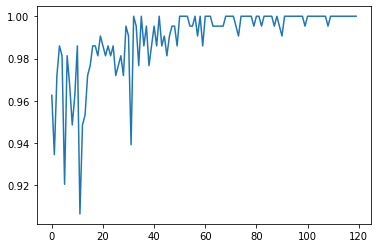

In [109]:
plt.plot(acc)
plt.savefig('ACC.PNG')